# Analyze output of .hdf5 files of hadrons code
June 12, 2023

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import subprocess as sp
import os 
import glob
import pandas as pd
import itertools

In [5]:
import gvar as gv
import h5py

In [6]:
%matplotlib notebook

m_f = 0.02 \
Want m_res < 10^-3

$ m_{phys} = m_f + m_{res} $ 

In [5]:
#  ## Code to explore hdf5 data
# def get_ds_dictionaries(name, node):
  
#     fullname = node.name
#     if isinstance(node, h5py.Dataset):
#     # node is a dataset
#         print(f'Dataset: {fullname}; adding to dictionary')
#         ds_dict[fullname] = node[:]
#         print('ds_dict size', len(ds_dict)) 
#     else:
#      # node is a group
#         print(f'Group: {fullname}; skipping')  
    
    
# ds_dict= {}    
# with h5py.File(output_dir+f1) as hf:
#     print(hf.visititems(get_ds_dictionaries))
# print(ds_dict)

# ds_dict= {}    
# with h5py.File(output_dir+f2) as hf:
#     print(hf.visititems(get_ds_dictionaries))
# print(ds_dict)


In [6]:
## Modules

def f_extract_meson(fname,meson_dict):
    
    with h5py.File(fname) as hf:
#         print(hf.keys())
        meson_dict['corr']=hf['meson']['meson_0']['corr'][:]

    return meson_dict

def f_extract_wi(fname,wi_dict):
    
    with h5py.File(fname) as hf:
#         print(hf.keys())
        for key1,value1 in hf['wardIdentity'].items():
    #         print(key1,value1)
            a1=hf['wardIdentity'][key1]
            wi_dict[key1]=a1[:]

    return wi_dict
    
    
def f_compute_mresidual(wi_dict,meson_dict):
    
    arr=np.array([i[0]/j[0] for i,j in zip(wi_dict['PJ5q'],meson_dict['corr'])])

    return arr

In [36]:
# main_dir='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_march14/measurements_hadrons/runs/'

main_dir='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_june15_mobius/dm_tests/meas_mobius/run3_/'

# run_dir=main_dir+'meas_run_Lx-16_Lt-32_Ls-32_beta-10.8_mf-0.1/063023_121344-tioga/'
# epoch=75

run_dir=main_dir+'meas_run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/063023_121337-tioga/'
epoch=120

# run_dir=main_dir+'/wilson_flow_test/meas_run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/063023_034716-tioga_spectrum/'
# epoch =100

## Older runs with better spectrum

run_dir=main_dir+'test_meas_run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/063023_115457-tioga/'
epoch=100

# run_dir=main_dir+'test_meas_run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/063023_115901-tioga/'
# epoch=90

# run_dir=main_dir+'test_meas_run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/063023_040243-tioga/'
# epoch=100



f1='eta_s_2pt.{0}.h5'.format(epoch)
f2='prop_gauge_DWF.{0}.h5'.format(epoch)


In [37]:

meson_dict={}
meson_dict=f_extract_meson(run_dir+f1,meson_dict)

wi_dict={}
wi_dict=f_extract_wi(run_dir+f2,wi_dict)

m_res=f_compute_mresidual(wi_dict,meson_dict)
print(m_res)


[2.16263441e-06 6.95036758e-06 2.74571899e-05 5.92250295e-05
 8.49808672e-05 1.27570026e-04 1.75408377e-04 2.24677513e-04
 2.99426198e-04 3.45652189e-04 3.89256338e-04 4.37110682e-04
 4.63921131e-04 4.98397689e-04 5.26226556e-04 5.33322996e-04
 4.94790442e-04 4.39799133e-04 4.28642332e-04 4.06842268e-04
 3.87440930e-04 3.62638237e-04 3.33970578e-04 2.89155110e-04
 2.35193436e-04 1.87040571e-04 1.37094226e-04 8.55794468e-05
 5.30161246e-05 2.40187619e-05 1.11347520e-05 3.88119543e-06]


In [38]:
m_res

array([2.16263441e-06, 6.95036758e-06, 2.74571899e-05, 5.92250295e-05,
       8.49808672e-05, 1.27570026e-04, 1.75408377e-04, 2.24677513e-04,
       2.99426198e-04, 3.45652189e-04, 3.89256338e-04, 4.37110682e-04,
       4.63921131e-04, 4.98397689e-04, 5.26226556e-04, 5.33322996e-04,
       4.94790442e-04, 4.39799133e-04, 4.28642332e-04, 4.06842268e-04,
       3.87440930e-04, 3.62638237e-04, 3.33970578e-04, 2.89155110e-04,
       2.35193436e-04, 1.87040571e-04, 1.37094226e-04, 8.55794468e-05,
       5.30161246e-05, 2.40187619e-05, 1.11347520e-05, 3.88119543e-06])

In [39]:
meson_dict.keys(),wi_dict.keys()

(dict_keys(['corr']), dict_keys(['DmuJmu', 'PA0', 'PJ5q', 'VDmuJmu']))

### Lx=16, Lt=32, m=0.1
### Ls=32, Mobius

<IPython.core.display.Javascript object>


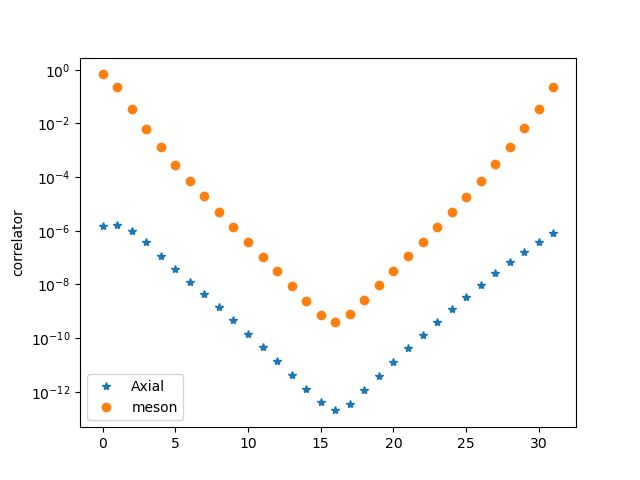

In [40]:
plt.figure()
y1=[i[0] for i in wi_dict['PJ5q']]
plt.plot(y1,linestyle='',marker='*',label='Axial')

y2=[i[0] for i in meson_dict['corr']]
plt.plot(y2,linestyle='',marker='o',label='meson')
plt.yscale('log')
plt.ylabel('correlator')
plt.legend()

<IPython.core.display.Javascript object>


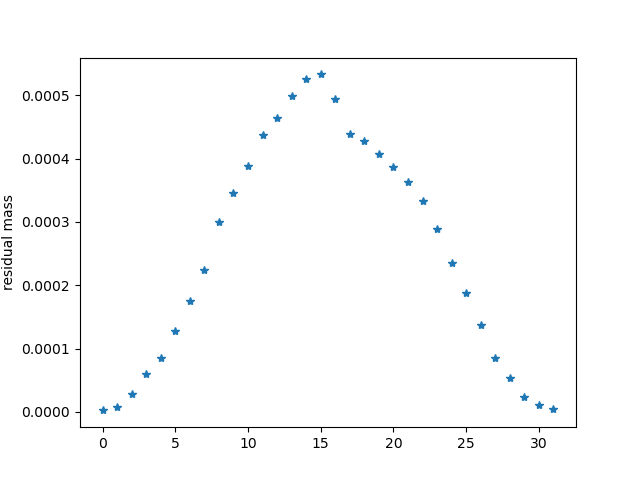

Text(0, 0.5, 'residual mass')

In [41]:
plt.figure()
plt.plot(m_res,linestyle='',marker='*')
plt.ylabel("residual mass")

In [1]:
fname='/usr/WS2/lsd/ayyar1/projects/SU4_sdm/runs_Grid/2023_june15_mobius/dm_tests/meas_mobius/run3_/wilson_flow_test/meas_run_Lx-16_Lt-32_Ls-16_beta-10.8_mf-0.1/063023_035356-tioga_wflow_and_spectrum/Wflow_.100.h5'

In [48]:
keys=['flow_time','Plaq_density','Clover_density','top_charge']
flow_vars=dict.fromkeys(keys)

with h5py.File(fname) as hf:
    for idx,key in enumerate(keys):
        print(type(hf['FlowObservables']['FlowObservables_%s'%(idx)]['data']))
        flow_vars[key]=np.array(hf['FlowObservables']['FlowObservables_%s'%(idx)]['data'])

<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>


In [42]:
flow_vars

{'flow_time': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 'Plaq_density': array([0.00148565, 0.00562196, 0.01195657, 0.0200764 , 0.02960838,
        0.04021925, 0.05161459, 0.06353718, 0.07576497, 0.08810861,
        0.10040881, 0.11253358, 0.12437543, 0.13584866, 0.1468867 ,
        0.15743971, 0.16747221, 0.17696104, 0.18589339, 0.19426515,
        0.2020793

<IPython.core.display.Javascript object>


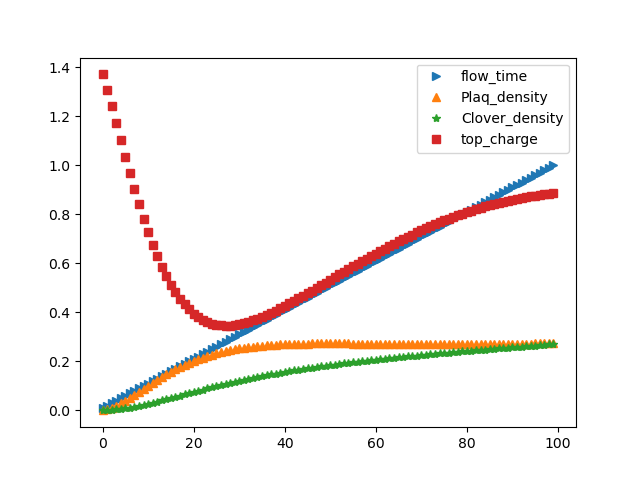

In [53]:
plt.figure()
for key,marker in zip(keys,itertools.cycle('>^*sDHPdpx_')):
    plt.plot(flow_vars[key],linestyle='',marker=marker,label=key)
    
plt.legend(loc='best')